# **Nama         : Wiguna Yanas Arifandi**
# **Kode Peserta : PYTN-KS14-007**

# Import Library

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import folium

# Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# membaca dataset pada drive
folder = '/content/drive/MyDrive/Colab Notebooks'
df = pd.read_csv(folder+'/london_crime_by_lsoa.csv')
df.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


# Data Preprocessing

In [4]:
# Print the first 5 rows of the dataset
print(df.head())

# Check the shape of the dataset
print(df.shape)

# Check for missing values
print(df.isnull().sum())


   lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   

                minor_category  value  year  month  
0  Burglary in Other Buildings      0  2016     11  
1               Other violence      0  2016     11  
2               Other violence      0  2015      5  
3  Burglary in Other Buildings      0  2016      3  
4            Personal Property      0  2008      6  
(13490604, 7)
lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64


# Scatter Plot

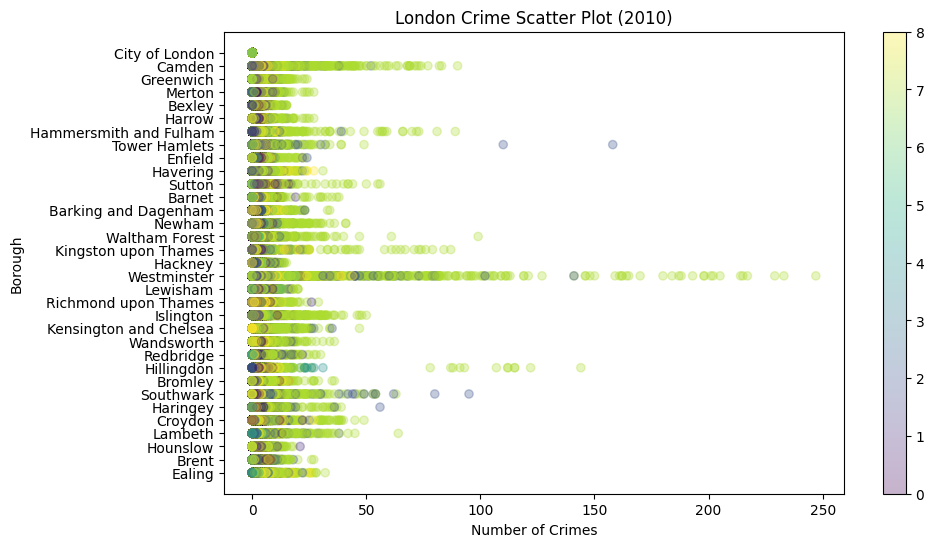

In [9]:
# Sortir data tahun 2010
df['major_category'] = df['major_category'].astype('category')
df_2010 = df[df['year'] == 2010]

# memilih kolom yang ingin digunakan untuk scatter plot
x = df_2010['value']
y = df_2010['borough']
categories = df_2010['major_category']

# membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=categories.cat.codes, alpha=0.3, cmap='viridis')
plt.colorbar()
plt.title('London Crime Scatter Plot (2010)')
plt.xlabel('Number of Crimes')
plt.ylabel('Borough')
plt.show()

Kode di atas akan membuat scatter plot yang menunjukkan jumlah kejahatan di setiap wilayah (kolom 'borough') pada tahun 2010. Sumbar x akan menunjukkan jumlah kejahatan (kolom 'value') dan sumbu warna akan menunjukkan jenis kejahatan utama (kolom 'major_category').

Pada scatter plot yang dibuat, warna dari setiap titik (scatter point) dihasilkan berdasarkan kategori dari kolom major_category. Penggunaan cat.codes pada c=categories.cat.codes akan mengubah setiap nilai unik pada kategori menjadi sebuah bilangan bulat (integer), dan setiap nilai unik akan diwakili oleh sebuah warna yang berbeda pada plot. Dalam kasus ini, karena terdapat beberapa kategori kejahatan yang memiliki jumlah lebih banyak daripada kategori lainnya, maka warna yang dihasilkan oleh bilangan bulat yang merepresentasikan kategori tersebut menjadi lebih gelap (lebih tua) pada cmap 'viridis'. Sebaliknya, warna yang dihasilkan oleh bilangan bulat yang merepresentasikan kategori yang jumlahnya lebih sedikit menjadi lebih terang pada cmap 'viridis'. Ini bertujuan agar setiap kategori dapat terlihat dengan jelas pada scatter plot dan memudahkan analisis terhadap pola kejahatan di London pada tahun 2010.

# Box Plot

<Figure size 1000x600 with 0 Axes>

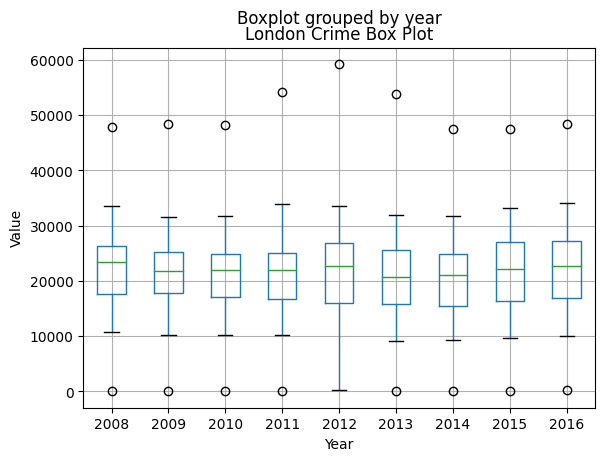

In [7]:
# Remove rows with missing values
df.dropna(inplace=True)

# Group data by borough and year, and calculate total crimes
grouped = df.groupby(['borough', 'year']).agg({'value': 'sum'}).reset_index()

# Create a boxplot
plt.figure(figsize=(10, 6))
grouped.boxplot(column='value', by='year')
plt.title('London Crime Box Plot')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

Kode di atas akan menghasilkan visualisasi boxplot yang memperlihatkan distribusi data jumlah kejahatan di setiap tahun, diurutkan berdasarkan kuartil dan outlier pada setiap tahunnya.

# Area Plot

<ipython-input-13-2dd932d8f69d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_10_areas = df.groupby('borough').sum().sort_values('value', ascending=False).head(10).index
<ipython-input-13-2dd932d8f69d>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df_top_10.groupby(['year', 'borough']).sum()


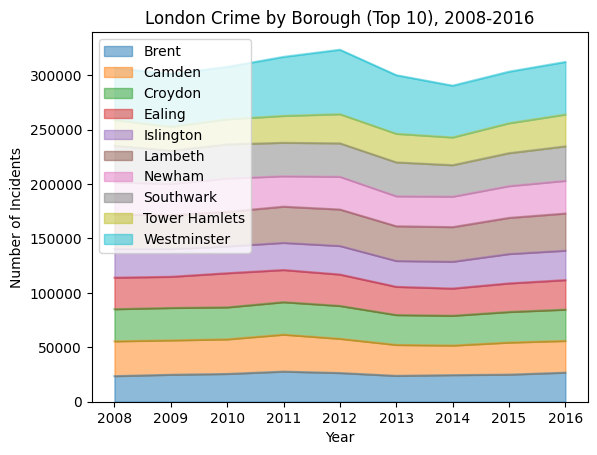

In [13]:
# Select the top 10 areas with the highest crime rates
top_10_areas = df.groupby('borough').sum().sort_values('value', ascending=False).head(10).index

# Filter the dataframe to only include the top 10 areas
df_top_10 = df[df['borough'].isin(top_10_areas)]

# Aggregate the data by year and borough
df_agg = df_top_10.groupby(['year', 'borough']).sum()

# Pivot the data to have boroughs as columns
df_pivot = df_agg.pivot_table(index='year', columns='borough', values='value')

# Create the area plot
df_pivot.plot(kind='area', stacked=True, alpha=0.5)

# Set plot properties
plt.title("London Crime by Borough (Top 10), 2008-2016")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.legend(loc='upper left')

# Show the plot
plt.show()

kode diatas memilih 10 wilayah dengan jumlah kejahatan tertinggi dan membuat area plot dari tahun 2008 hingga 2016.

# Histogram


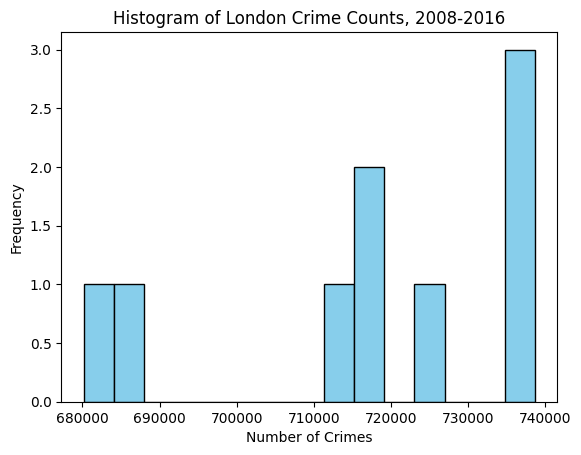

In [17]:
# Filter the data to include only crimes in 2010
df = df[(df['year'] >= 2008) & (df['year'] <= 2016)]

# Group the data by year and sum the number of crimes
crime_counts = df.groupby('year')['value'].sum()

# Create the histogram
plt.hist(crime_counts, bins=15, color='skyblue', edgecolor='black')

# Set plot properties
plt.title("Histogram of London Crime Counts, 2008-2016")
plt.xlabel("Number of Crimes")
plt.ylabel("Frequency")

# Show the plot
plt.show()

# Bar Chart

<ipython-input-23-1cd105a740de>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df_2010.groupby(['month']).sum()


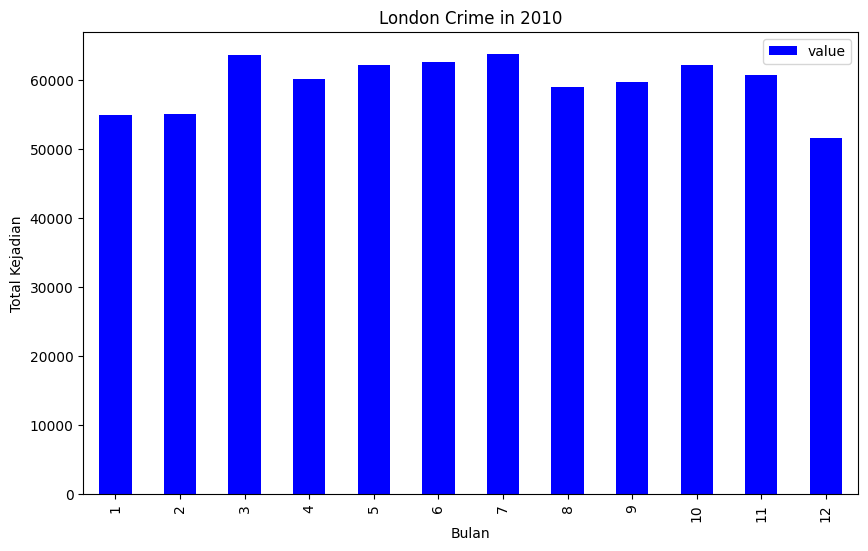

In [23]:
# Filter the dataset to year 2010
df_2010 = df[df['year'] == 2010]

# Group the data by month and calculate the total number of crimes
df_monthly = df_2010.groupby(['month']).sum()

# Create the bar chart
df_monthly.plot(kind='bar', y='value', figsize=(10, 6), color='blue')

# Set plot properties
plt.title("London Crime in 2010")
plt.xlabel("Bulan")
plt.ylabel("Total Kejadian")

# Show the plot
plt.show()

dari bar chart diatas, pada tahun 2010 total kejahatan paling banyak terjadi pada bulan 3 (maret) dan paling sedikit terjadi pada bulan terakhir (desember).

# Pie Chart

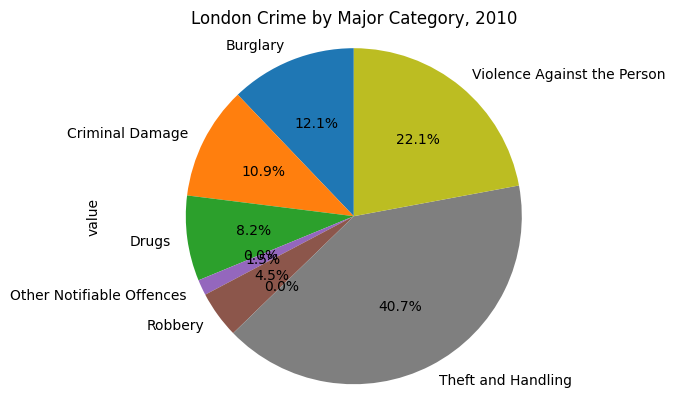

In [24]:
# Filter the data for the year 2010
df_2010 = df[df['year'] == 2010]

# Group the data by major category and sum the values
df_agg = df_2010.groupby('major_category')['value'].sum()

# Create the pie chart
df_agg.plot(kind='pie', autopct='%1.1f%%', startangle=90)

# Set plot properties
plt.axis('equal')
plt.title("London Crime by Major Category, 2010")

# Show the plot
plt.show()

Pie chart diatas menggambarkan data kejahatan major pada tahun 2010. Terlihat bahwa theft and handling mendominasi dengan persentase 40.7 %.

# WordCloud

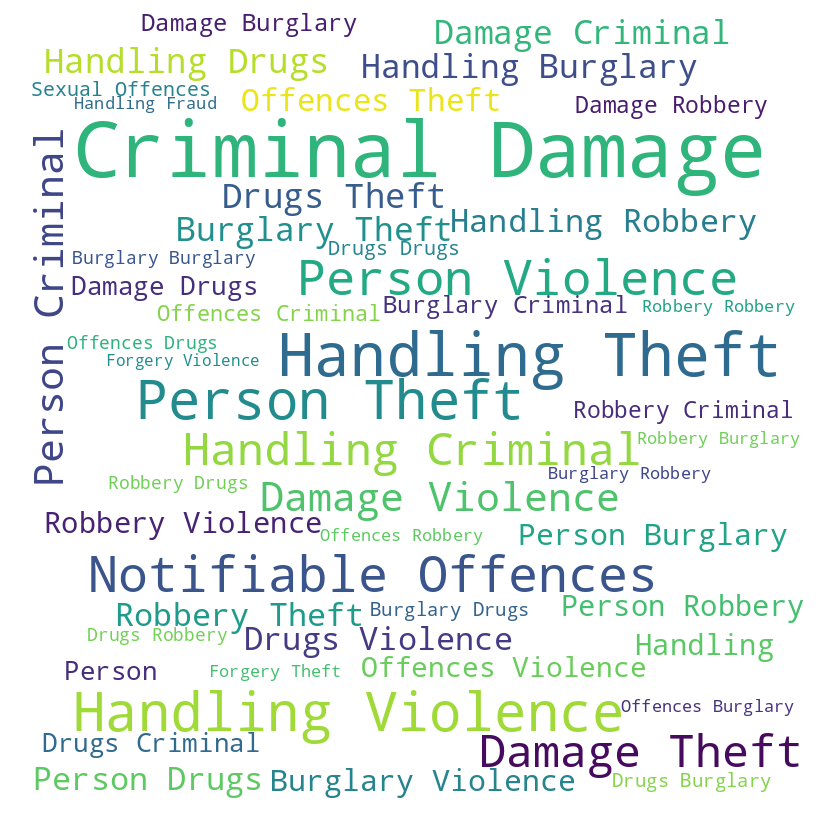

In [26]:
# Menggabungkan semua string dalam kolom menjadi satu string
text = ' '.join(df['major_category'])

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50).generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

Berdasarkan worldclouds yang telah dibuat, kata yang paling sering muncul dalam dataset adalah Criminal Damage sesuai dengan banyaknya data pada kategori kejahatan tersebut

# Folium Map

In [34]:
# Load the crime data from CSV file
crime_data = df

# Create a base map centered on London
london_map = folium.Map(location=[51.5074, -0.1278], zoom_start=10)

# Group the data by borough and calculate the total crime count
borough_data = crime_data.groupby('borough').agg({'value': 'sum'}).reset_index()

# Add a choropleth layer to the map showing the total crime count by borough
folium.Choropleth(
    geo_data='/content/drive/MyDrive/Colab Notebooks/london_boroughs.json',  # GeoJSON file containing the boundaries of London boroughs
    name='choropleth',
    data=borough_data,
    columns=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Crime Count'
).add_to(london_map)

# Add a layer control to the map so that the choropleth can be toggled on/off
folium.LayerControl().add_to(london_map)

# Display the map
london_map

Dari folium map yang dipadukan dengan heat map ditunjukan bahwa kejahatan paling sering terjadi di pusat kota dengan count rata rata 75 lalu semakin mengecil hingga ke pinggiran daerah